In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dropout
#from sklearn import datasets
import random

In [110]:
np.random.seed(0)

In [111]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the nbumber of labes."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the nbumber of labes."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

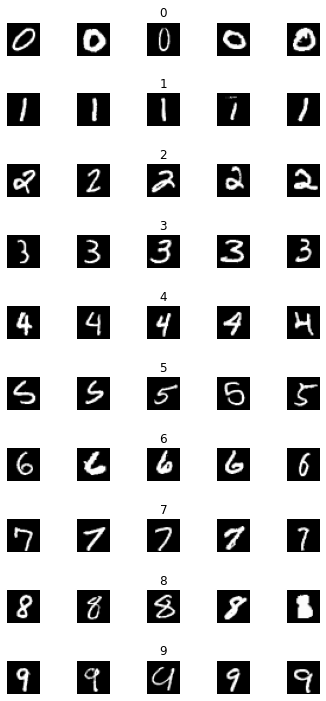

In [112]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


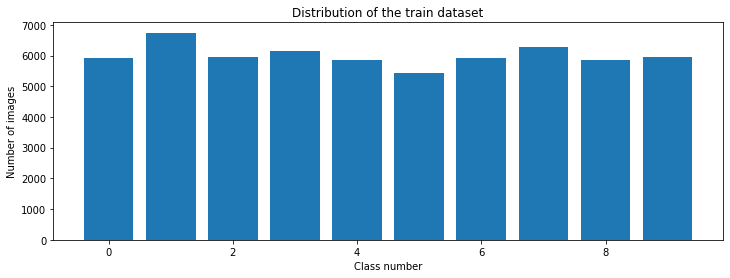

In [113]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [114]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [115]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [116]:
#Letnet based model
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.01), loss = "categorical_crossentropy", metrics=["accuracy"])
  return model


In [117]:
model = leNet_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [118]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle =1)


Epoch 1/10
135/135 [==============================] - 2s 9ms/step - loss: 0.2342 - accuracy: 0.9239 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0465 - val_accuracy: 0.9867
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0404 - val_accuracy: 0.9903
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0469 - val_accuracy: 0.9855
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0364 - val_accuracy: 0.9903
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0472 - val_accuracy: 0.9875
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0363 - val_accuracy: 0.9910
Epoch 

Text(0.5, 0, 'epoch')

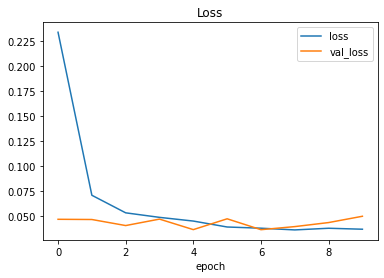

In [119]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['loss', 'val_loss'])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

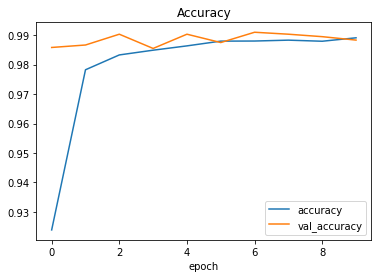

In [120]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")

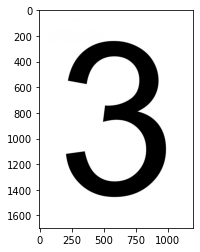

In [121]:
import requests
from PIL import Image
url = "https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap("gray"))

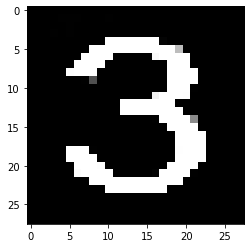

In [122]:
import cv2
img_array = np.asarray(img)

resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
img = image
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [123]:
img = img/255
img = img.reshape(1,28,28,1)
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))

predicted digit: [3]


In [124]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print("Test Score:", score[0])
print("Test accuracy:", score[1])

<class 'list'>
Test Score: 0.03912397846579552
Test accuracy: 0.9879000186920166


In [125]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 =layer1.predict(img), layer2.predict(img)


(1, 24, 24, 30)
(1, 10, 10, 15)


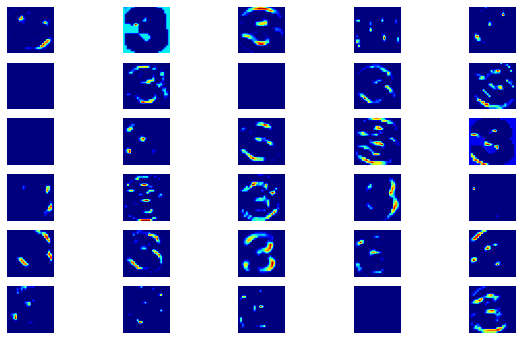

In [127]:
plt.figure(figsize = (10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap("jet"))
  plt.axis("off")


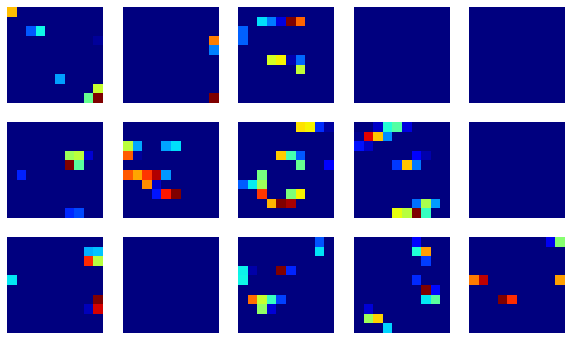

In [128]:
plt.figure(figsize = (10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap("jet"))
  plt.axis("off")